In [1]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
from finta import TA
import mplfinance as mpf
from pandas_datareader import data as web
import yfinance as yf
from datetime import datetime

%matplotlib notebook

In [2]:
def get_stock_data(symbol):
    end_date = datetime.now()
    start_date = datetime(2000, 1, 1)
    stock = yf.Ticker(symbol)
    df = stock.history(start=start_date, end=end_date, auto_adjust=True)

    return df

In [3]:
def add_stock_data(symbol, data_set):
    end_date = datetime.now()
    start_date = datetime(2003, 1, 1)
    stock = yf.Ticker(symbol)
    df = stock.history(start=start_date, end=end_date, auto_adjust=True)
    hist_close = df[["Close"]]
    print(df)
    hist_close.rename(columns={"Close": symbol+"_close"}, inplace = True)
    hist_close.index.names = ['date']
    dataset = pd.merge(data_set, hist_close, on=["date"])
    return dataset

In [4]:
#df = pd.read_csv('./data/MSFT_daily.csv',header=0, index_col="date", parse_dates=True)

#df = df.iloc[::-1]

#df.columns = ["open", "high", "low", "close", "volume"]
#df = df.iloc[::-1]

<IPython.core.display.Javascript object>


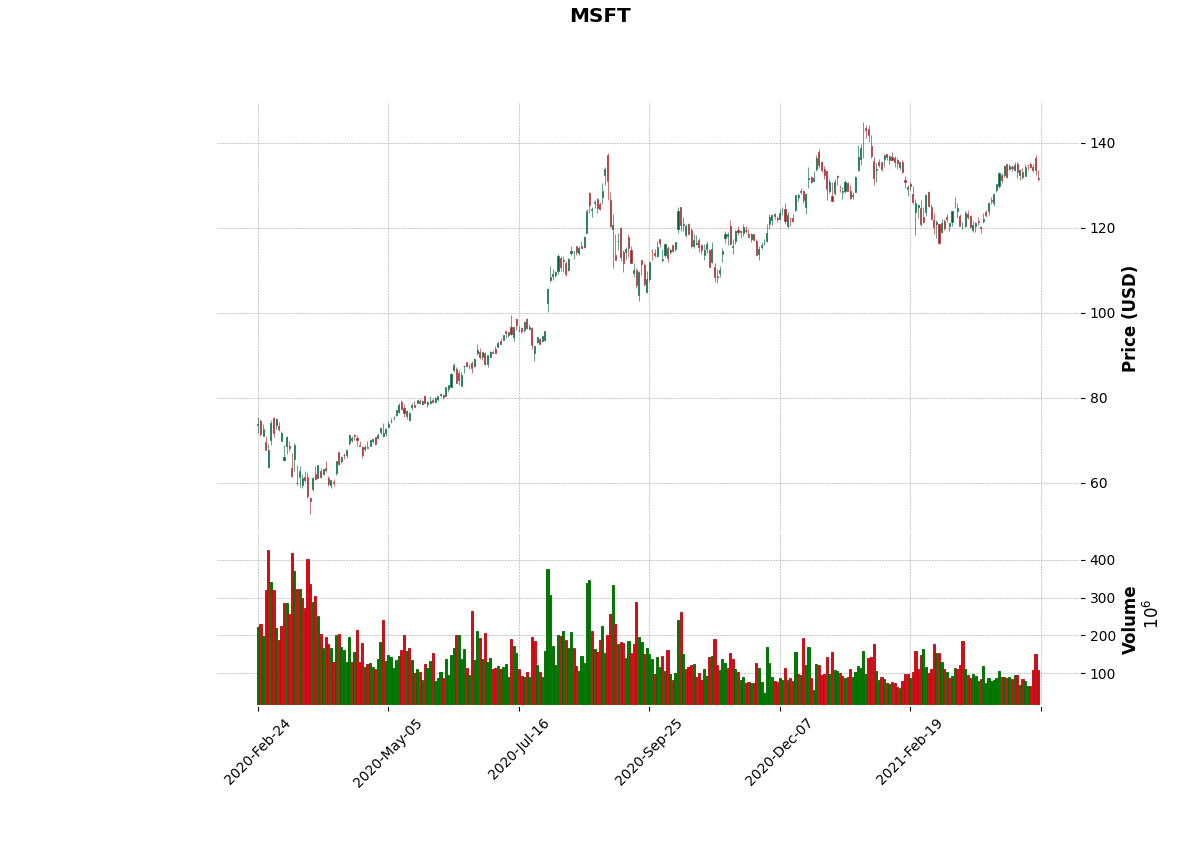

In [5]:
df = get_stock_data("AAPL")
mpf.plot(df.tail(300), type='candle', style='charles',
        title='MSFT',
        ylabel='Price (USD)',
        ylabel_lower='Volume',
        volume=True,
        figscale=1.5,
        )

In [6]:
df.dtypes
#df['Datetime'] = pd.to_datetime(df['Date'], format="%Y/%m/%d")

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object

<IPython.core.display.Javascript object>


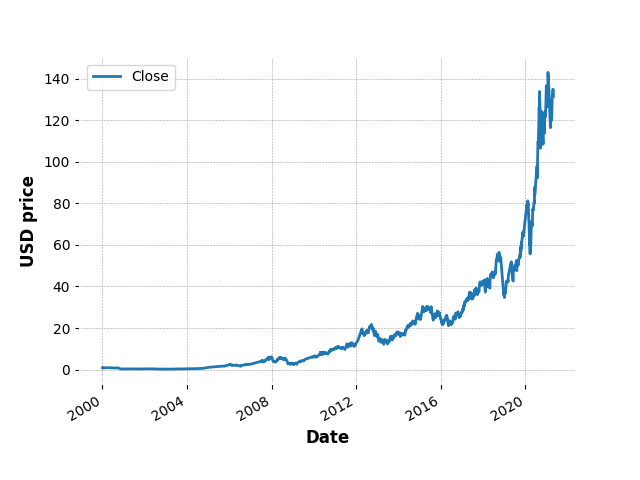

Text(0.5, 0, 'Date')

In [7]:
ax = df.plot(y='Close')

ax.set_ylabel("USD price")
ax.set_xlabel("Date")

In [8]:
import math
def get_technical_indicators(dataset):
    # Create 7 and 21 days Moving Average
    dataset['ma7'] = dataset['Close'].rolling(window=7).mean()
    dataset['ma21'] = dataset['Close'].rolling(window=21).mean()
    
    # Create MACD
    dataset['26ema'] = dataset['Close'].ewm(span=26).mean()
    dataset['12ema'] = dataset['Close'].ewm(span=12).mean()
    dataset['MACD'] = (dataset['Close']-dataset['26ema'])

    # Create Bollinger Bands
    dataset['21sd'] =  dataset['Close'].rolling(window=21).std()
    dataset['upper_band'] = dataset['ma21'] + (dataset['21sd']*2)
    dataset['lower_band'] = dataset['ma21'] - (dataset['21sd']*2)
    
    # Create Exponential moving average
    dataset['ema'] = dataset['Close'].ewm(com=0.5).mean()
    
    # Create Momentum
    dataset['momentum'] = dataset['Close']-1
    dataset['log-momentum'] = np.log(dataset['momentum'])
    
    return dataset

In [9]:
dataset_TI_df = get_technical_indicators(df)

/home/eshahrivar/.local/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<IPython.core.display.Javascript object>


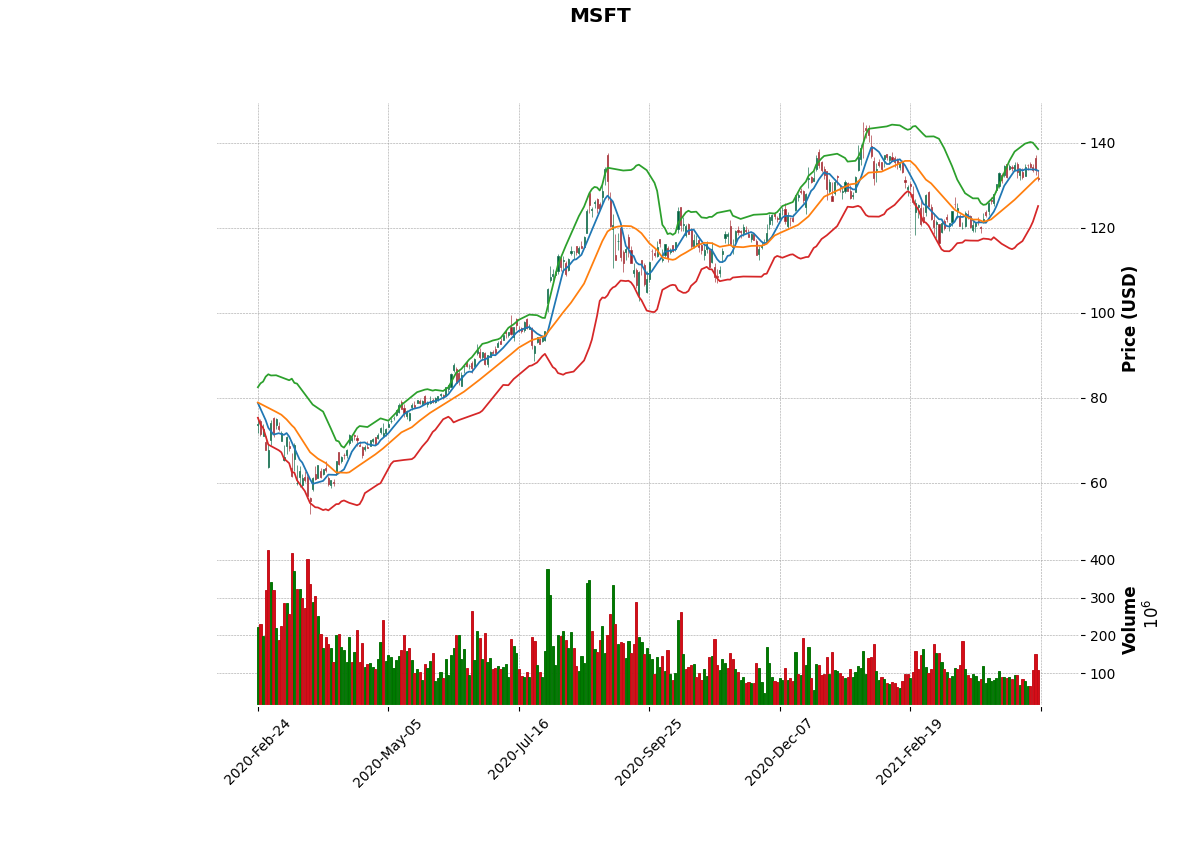

In [10]:
import mplfinance as mpf

bands_plot = pd.concat([dataset_TI_df['ma7'].tail(300), dataset_TI_df['ma21'].tail(300), 
                        dataset_TI_df['upper_band'].tail(300), dataset_TI_df['lower_band'].tail(300)], axis=1)

apd = mpf.make_addplot(bands_plot)

mpf.plot(dataset_TI_df.tail(300), type='candle', style='charles',
        title='MSFT',
        ylabel='Price (USD)',
        ylabel_lower='Volume',
        volume=True,
        figscale=1.5,
        addplot=apd
        )

In [13]:
import matplotlib.pyplot as plt

def plot_technical_indicators(dataset, last_days):
  
    dataset = dataset.iloc[-last_days:, :]
    x_ = range(3, dataset.shape[0])
    x_ =list(dataset.index)

    plt.figure(figsize=(16, 10), dpi=100)
    shape_0 = dataset.shape[0]
    xmacd_ = shape_0-last_days
    
    print(xmacd_)
    
    # Plot first subplot
    plt.subplot(2, 1, 1)
    plt.plot(dataset['ma7'],label='MA 7', color='g',linestyle='--')
    plt.plot(dataset['Close'],label='Closing Price', color='b')
    plt.plot(dataset['ma21'],label='MA 21', color='r',linestyle='--')
    plt.plot(dataset['upper_band'],label='Upper Band', color='c')
    plt.plot(dataset['lower_band'],label='Lower Band', color='c')
    plt.fill_between(x_, dataset['lower_band'], dataset['upper_band'], alpha=0.35)
    plt.title('Technical indicators for Microsofts - last {} days.'.format(last_days))
    plt.ylabel('USD')
    plt.legend()

    # Plot second subplot
    plt.subplot(2, 1, 2)
    plt.title('MACD')
    plt.plot(dataset['MACD'],label='MACD', linestyle='-.')
    plt.plot(dataset['log-momentum'],label='Momentum', color='b',linestyle='-')

    plt.legend()
    plt.show()

<IPython.core.display.Javascript object>


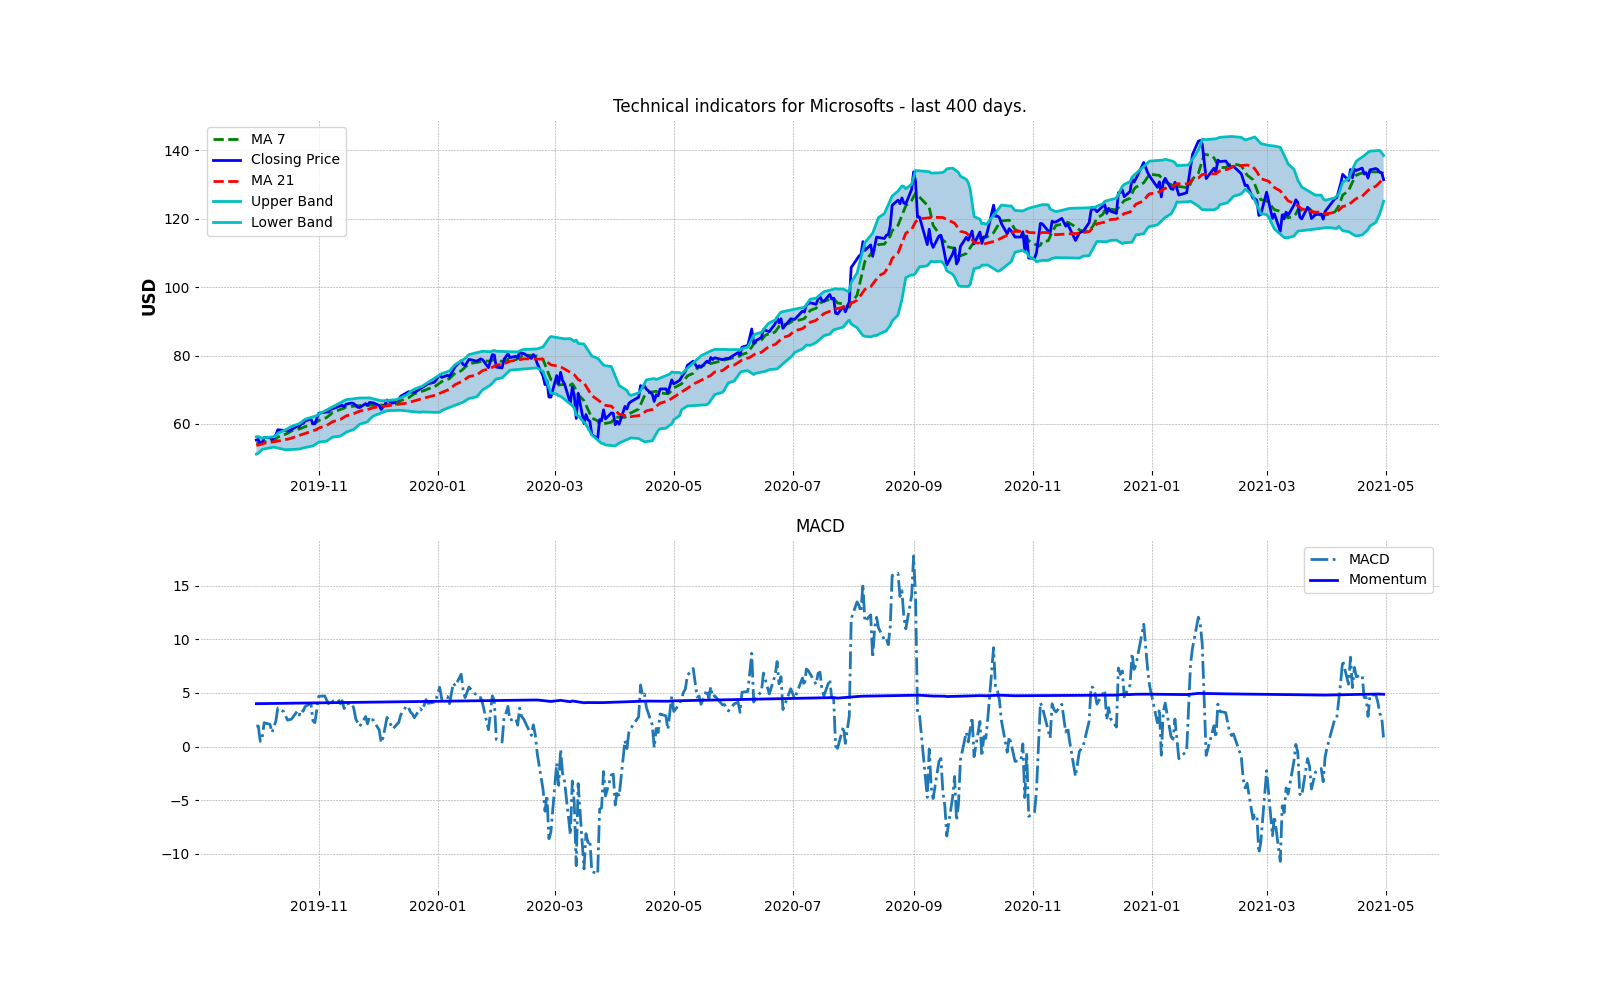

0


In [14]:
plot_technical_indicators(dataset_TI_df, 400)

In [15]:
dataset_TI_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,ma7,ma21,26ema,12ema,MACD,21sd,upper_band,lower_band,ema,momentum,log-momentum
Date,,,,,,,,,,,,,,,,,,
2000-01-03,0.806567,0.865209,0.782053,0.860883,535796800,0.0,0.0,NaN,NaN,0.860883,0.860883,0.000000,NaN,NaN,NaN,0.860883,-0.139117,NaN
2000-01-04,0.832523,0.850789,0.778208,0.788302,512377600,0.0,0.0,NaN,NaN,0.823197,0.821568,-0.034895,NaN,NaN,NaN,0.806447,-0.211698,NaN
2000-01-05,0.797915,0.850308,0.792147,0.799837,778321600,0.0,0.0,NaN,NaN,0.814804,0.813086,-0.014967,NaN,NaN,NaN,0.801871,-0.200163,NaN
2000-01-06,0.816181,0.822910,0.730621,0.730621,767972800,0.0,0.0,NaN,NaN,0.791270,0.787055,-0.060649,NaN,NaN,NaN,0.753777,-0.269379,NaN
2000-01-07,0.742157,0.776765,0.734466,0.765229,460734400,0.0,0.0,NaN,NaN,0.785231,0.781125,-0.020002,NaN,NaN,NaN,0.761443,-0.234771,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,134.830002,135.059998,133.559998,134.720001,66905100,0.0,0.0,133.798573,129.514763,129.906590,132.486304,4.813411,5.275836,140.066435,118.963090,134.381224,133.720001,4.895748
2021-04-27,135.009995,135.410004,134.110001,134.389999,66015800,0.0,0.0,133.831430,130.142382,130.238695,132.779180,4.151305,5.016053,140.174487,120.110276,134.387074,133.389999,4.893277
2021-04-28,134.309998,135.020004,133.080002,133.580002,107760100,0.0,0.0,133.651430,130.722858,130.486199,132.902384,3.093803,4.644097,140.011052,121.434664,133.849026,132.580002,4.887186


In [17]:
df.dropna(axis=0, how='any')

,Open,High,Low,Close,Volume,Dividends,Stock Splits,ma7,ma21,26ema,12ema,MACD,21sd,upper_band,lower_band,ema,momentum,log-momentum
Date,,,,,,,,,,,,,,,,,,
2000-03-01,0.911834,1.015658,0.911353,1.002200,1077003200,0.0,0.0,0.894135,0.865420,0.867638,0.890818,0.134562,0.050964,0.967348,0.763493,0.960451,0.002200,-6.119511
2000-03-21,0.942597,1.051709,0.935387,1.037770,524328000,0.0,0.0,0.940811,0.929739,0.922335,0.947774,0.115435,0.048375,1.026489,0.832988,1.007415,0.037770,-3.276242
2000-03-22,1.021187,1.110352,1.011814,1.108909,567996800,0.0,0.0,0.965944,0.940863,0.936344,0.972566,0.172565,0.060557,1.061977,0.819749,1.075078,0.108909,-2.217241
2000-03-23,1.092086,1.156496,1.076704,1.086799,562564800,0.0,0.0,0.995677,0.950042,0.947629,0.990142,0.139170,0.067335,1.084711,0.815372,1.082892,0.086799,-2.444164
2000-03-24,1.095450,1.106987,1.042096,1.066610,446913600,0.0,0.0,1.020328,0.958642,0.956545,1.001907,0.110065,0.070219,1.099079,0.818205,1.072037,0.066610,-2.708899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,134.830002,135.059998,133.559998,134.720001,66905100,0.0,0.0,133.798573,129.514763,129.906590,132.486304,4.813411,5.275836,140.066435,118.963090,134.381224,133.720001,4.895748
2021-04-27,135.009995,135.410004,134.110001,134.389999,66015800,0.0,0.0,133.831430,130.142382,130.238695,132.779180,4.151305,5.016053,140.174487,120.110276,134.387074,133.389999,4.893277
2021-04-28,134.309998,135.020004,133.080002,133.580002,107760100,0.0,0.0,133.651430,130.722858,130.486199,132.902384,3.093803,4.644097,140.011052,121.434664,133.849026,132.580002,4.887186


In [ ]:
#add vix data
df_vix = pd.read_csv("./data/vix-daily.csv", header=0, index_col="Date", parse_dates=True)
df_vix.index.names = ['date']
dataset_TI_df = pd.merge(dataset_TI_df, df_vix, on=["date"])
dataset_TI_df

In [ ]:
add_stock_date("AAPL", dataset_TI_df)

In [ ]:
#add similar company data
df_AAPL = pd.read_csv("./data/AAPL_daily.csv", header=0, index_col="date", parse_dates=True)
df_AAPL_close = df_AAPL[['4. close']]
df_AAPL_close.rename(columns={"4. close": "AAPL_close"}, inplace = True)
dataset_TI_df = pd.merge(dataset_TI_df, df_AAPL_close, on=["date"])
dataset_TI_df

In [ ]:
df_FB = pd.read_csv("./data/FB-daily.csv", header=0, index_col="Date", parse_dates=True)
df_AMZN = pd.read_csv("./data/AMZN-daily.csv", header=0, index_col="Date", parse_dates=True)
df_GOOG = pd.read_csv("./data/GOOG-daily.csv", header=0, index_col="Date", parse_dates=True)